In [11]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.ndimage.filters import convolve

C:\Users\jeanc\AppData\Local\Temp\ipykernel_2808\2106163648.py:6: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


In [13]:
# define SOBEL FILTER for filter 

Gx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
Gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])



**CANNY DETECTOR**

- Filter Image with Derivarive(d1) Gaussian
- Find magnitude and orientation of gradient
- Non-maximun supression
- Linking and thresholding

In [14]:
def gaussian_kernel(size,gamma = 1):
    size = int(size)//2
    x,y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 /(2.0 * np.pi *  gamma**2)
    g =  np.exp(-((x**2+y**2)/(2.0* gamma**2)))*normal
    return  g

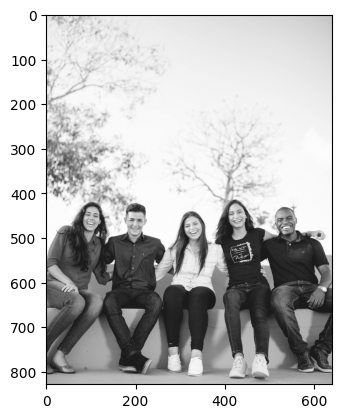

In [15]:
image = cv2.imread('Resources/Photos/group 2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image,cmap="gray")

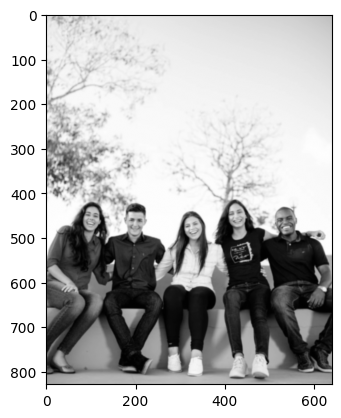

In [16]:
smoth_img = convolve(image,gaussian_kernel(5))
plt.imshow(smoth_img,cmap="gray")

(<Axes: >, [<matplotlib.lines.Line2D at 0x232d75da5d0>])

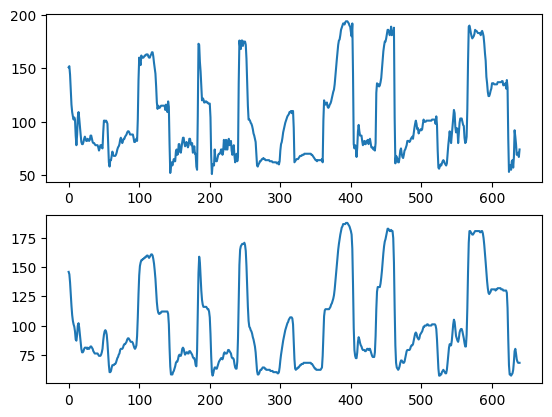

In [17]:
y = image[700,:]
x = np.arange(len(y))
plt.subplot(2,1,1),plt.plot(x,y)
y_ = smoth_img[700,:]
x_ = np.arange(len(y_))
plt.subplot(2,1,2),plt.plot(x_,y_)

In [20]:
def sobel_filter(image):
    Gx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],np.float32)
    Gy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]],np.float32)

    Ix = convolve(image,Gx)
    Iy = convolve(image,Gy)

    G = np.hypot(Ix,Iy)
    G = G/G.max() * 255
    theta = np.arctan(Ix/Iy)

    return G,theta

C:\Users\jeanc\AppData\Local\Temp\ipykernel_2808\832599906.py:10: RuntimeWarning: divide by zero encountered in divide
  theta = np.arctan(Ix/Iy)
C:\Users\jeanc\AppData\Local\Temp\ipykernel_2808\832599906.py:10: RuntimeWarning: invalid value encountered in divide
  theta = np.arctan(Ix/Iy)


(<Axes: >, <matplotlib.image.AxesImage at 0x232d7775a90>)

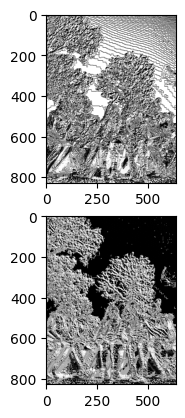

In [21]:
gamma_scores,theta_scores = sobel_filter(smoth_img)\

plt.subplot(2,1,1),plt.imshow(theta_scores, cmap="gray")
plt.subplot(2,1,2),plt.imshow(gamma_scores, cmap="gray")

In [31]:
def non_max_supression(image,D):
    N,M = image.shape
    grads = np.zeros((N,M),dtype=np.int32)
    angle = D * 180. / np.pi
    #define the diferent kinda angles to compute
    for n in range(N-1):
        for m in range(M-1):
            try:
                q = 255
                r = 255
                if (0 <= angle[n,m] < 22.5) or (157.5 <= angle[n,m] < 180):
                    q = image[n,m+1]
                    r = image[n,m-1]
                elif (22.5 <= angle[n,m] < 67.5):
                    q = image[n+1,m-1]
                    r = image[n-1,m+1]
                elif (67.5 <= angle[n,m] < 112.5):
                    q = image[n+1,m]
                    r = image[n-1,m]
                elif (112.5 <= angle[n,m] <= 157.5):
                    q = image[n-1,m-1]
                    r = image[n+1,m+11]

                if (image[n,m] >= q) and (image[n,m]>= r):
                    grads[n,m] = image[n,m]
                else:
                    grads[n,m] = 0
            except IndexError as iE:
                pass
    return grads

(<Axes: >, <matplotlib.image.AxesImage at 0x232db696fd0>)

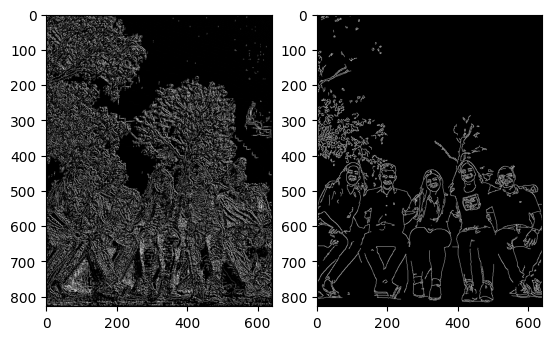

In [34]:
nonMax = non_max_supression(gamma_scores,theta_scores)

plt.subplot(1,2,1),plt.imshow(nonMax, cmap = "gray")
plt.subplot(1,2,2),plt.imshow(cv2.Canny(image,100,200),cmap = "gray")

In [2]:
from transformers import AutoImageProcessor, Mask2FormerForUniversalSegmentation

processor = AutoImageProcessor.from_pretrained("facebook/mask2former-swin-large-coco-panoptic")
model = Mask2FormerForUniversalSegmentation.from_pretrained("facebook/mask2former-swin-large-coco-panoptic")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


In [ ]:
image = cv2.imread("Resources\Photos\cats.jpg")
input = processor(images = image, return_tensors = "pt")
input["pixel_values"].shape

with torch.no_grad():
    outputs = model(**input)

class_queries_logits = outputs.class_queries_logits
masks_queries_logits = outputs.masks_queries_logits

result = processor.post_process_panoptic_segmentation(outputs, target_sizes=[image.size[::-1]])[0]

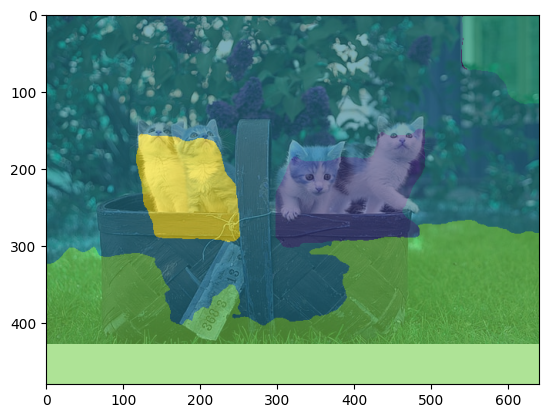

In [53]:
plt.imshow(image)
plt.imshow(result["segmentation"],alpha=0.6)

**Tests**

'gola'

In [27]:
import math
def get_ks(n,m):
    mcd = math.gcd(n,m)
    ks = set()
    for i in range(1,int(mcd**0.5)+1,1):
        if mcd%i == 0:
            ks.add(i)
            ks.add(mcd//i)
    ks = sorted(d for d in ks if d>1)
    print(f"{len(ks)}")
    if ks:
        print(f"{' '.join(map(str,ks))}")

def __main__():
    n,m = map(int,input().split())
    get_ks(n,m)

__main__()

1
3


In [22]:
import math 
math.gcd(56,48)

8

In [28]:
!pip install pytesseract


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pytesseract
from PIL import Image
import cv2
import matplotlib.pyplot as plt
image = cv2.imread("images\image.jpeg")

<>:5: SyntaxWarning: invalid escape sequence '\i'
<>:5: SyntaxWarning: invalid escape sequence '\i'
C:\Users\jeanc\AppData\Local\Temp\ipykernel_15052\2359903697.py:5: SyntaxWarning: invalid escape sequence '\i'
  image = cv2.imread("images\image.jpeg")


In [69]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Aumentar el contraste (opcional)
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Dimensiones de la imagen
height, width = binary_image.shape


In [ ]:
imaget = binary_image[(1271//21):(1271//21)*2+20,64:64*2]
rotation_angle = -45
(h,w) =  imaget.shape[:2]
center = (w//2,h//2)
M = cv2.getRotationMatrix2D(center,rotation_angle,1)

rotated_image = cv2.warpAffine(imaget,M,(w,h),flags= cv2.INTER_CUBIC,borderMode=cv2.BORDER_REPLICATE)

letter = pytesseract.image_to_string(rotated_image,config='--psm 10 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ').strip()

print("Letter:", letter)

Letter: N


In [104]:
import numpy as np

In [221]:
def justify_rotation(image):
    grayimage = cv2.cvtColor(image , cv2.COLOR_BGR2GRAY)
    _,binimage = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    edges = cv2.Canny(binimage, 50, 150, apertureSize=3)
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return image
    
    cnt = max(contours, key=cv2.contourArea)
    rect = cv2.minAreaRect(cnt)
    angle = rect[2]

    if angle < -45:
        angle = 90 + angle

    rotated_angle = -angle
    (h,w) = grayimage.shape[:2]
    center = (w//2 ,h//2)
    M = cv2.getRotationMatrix2D(center,rotated_angle, 1.)

    rotated_image = cv2.warpAffine(grayimage,M,(h,w),flags= cv2.INTER_CUBIC, borderMode= cv2.BORDER_REPLICATE)
    
    return rotated_image

In [230]:
import cv2
import numpy as np

def justify_rotation(image):
    """
    Rota una imagen para alinearla horizontalmente basándose en el texto detectado.
    """
    # Convertir a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar desenfoque y binarización
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Usar transformación morfológica para unir caracteres
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 5))
    dilated = cv2.dilate(binary, kernel, iterations=3)
    
    # Encontrar contornos
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    if not contours:
        return image
    
    # Encontrar el contorno que probablemente contiene el texto
    cnt = max(contours, key=cv2.contourArea)
    
    # Obtener el rectángulo rotado que engloba el contorno
    rect = cv2.minAreaRect(cnt)
    angle = rect[2]
    
    # Ajustar el ángulo
    if angle < -45:
        angle = 90 + angle
    elif angle > 45:
        angle = angle - 90
    
    # Rotar la imagen
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(gray, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return rotated

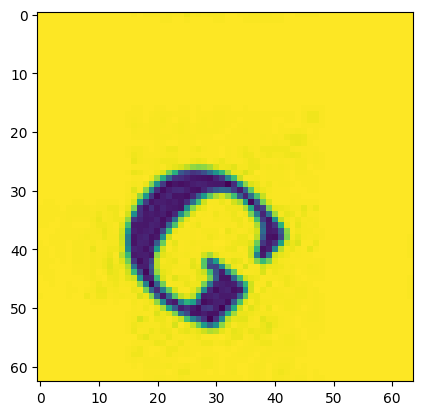

In [231]:
k = 20
n,m = image.shape[:2]
h,w = (n//k,m//k)
plt.imshow(justify_rotation(image[h:h*2,w*15:w*16]))

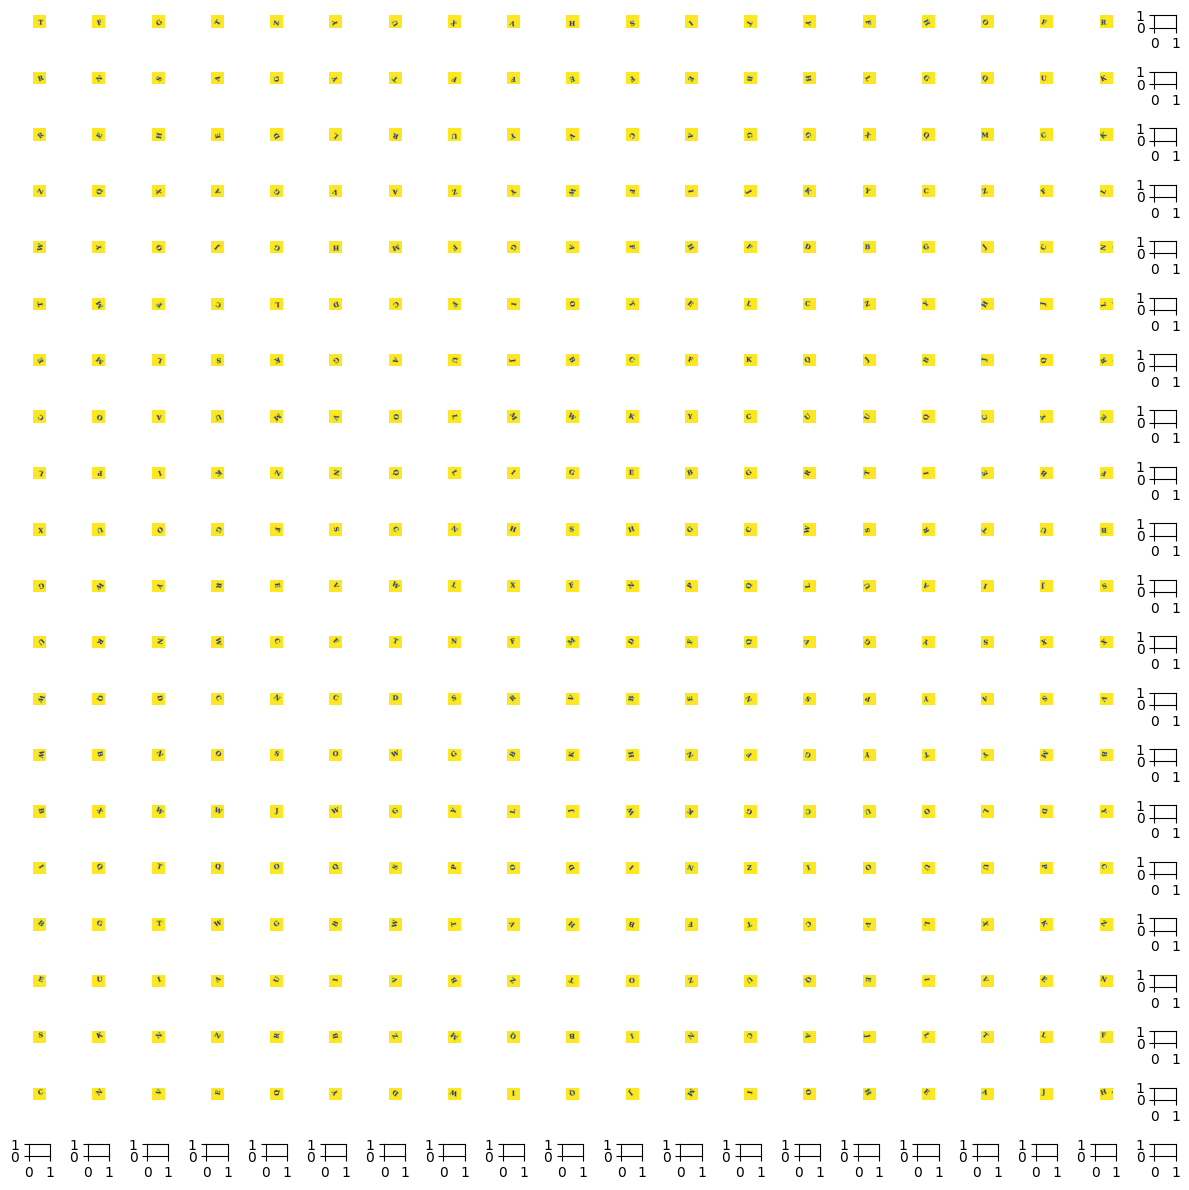

In [232]:

# Parámetros para dividir la imagen en parches
k = 20
n, m = image.shape[:2]
h, w = n // k , m // k 

# Calcular el número de filas y columnas del grid de subplots
num_rows = int(np.ceil(n / h))
num_cols = int(np.ceil(m / w))

# Crear una figura para mostrar todos los parches rotados
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Dividir la imagen en parches y rotarlos
for i in range(5, n - h + 1, h):
    for j in range(5, m - w + 1, w):
        # Extraer el parche
        patch = image[i:i + h, j:j + w]
        
        # Rotar el parche
        justified = justify_rotation(patch)
        
        # Mostrar el parche rotado en el subplot correspondiente
        row_idx = i // h
        col_idx = j // w
        axes[row_idx, col_idx].imshow(justified)
        axes[row_idx, col_idx].axis('off')  # Ocultar ejes
plt.tight_layout()
plt.show()

In [ ]:
k = 20
n,m = image.shape[:2]
h,w = (n//k,m//k)
for i in range(5,n-h+1,h):
    for j in range(5,m-w+1,w):
        justified = justify_rotation(image[i:i+h, j:j+w])
        plt.imshow(justified)


Error in callback <function flush_figures at 0x00000289901809A0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
#C:\Users\jeanc\AppData\Local\Programs\Tesseract-OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR
\tesseract.exe'

In [237]:
pytesseract.image_to_string(justify_rotation(image[h*2:h*3,w*2:w*3-5]),config='--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ')

'Z\n'

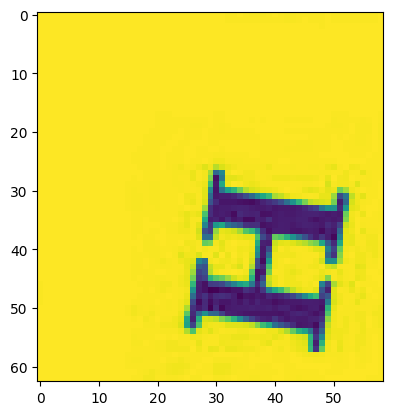

In [235]:
plt.imshow(justify_rotation(image[h*2:h*3,w*2:w*3-5]))

In [239]:
import cv2
import numpy as np
from collections import defaultdict
import pytesseract
import math

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
    return cleaned

def find_letters(image):
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    letter_contours = []
    
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 50:  # Filtrar pequeños ruidos
            letter_contours.append(cnt)
    
    return letter_contours

def correct_rotation(letter_img):
    coords = np.column_stack(np.where(letter_img > 0))
    angle = cv2.minAreaRect(coords)[-1]
    
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
        
    (h, w) = letter_img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(letter_img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return rotated

def recognize_letter(letter_img):
    # Configuración para solo mayúsculas y un solo caracter
    custom_config = r'--oem 3 --psm 10 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    letter = pytesseract.image_to_string(letter_img, config=custom_config).strip()
    return letter if letter else '?'

def count_letters(image_path):
    image = cv2.imread(image_path)
    processed = preprocess_image(image)
    letters = find_letters(processed)
    
    letter_counts = defaultdict(int)
    
    for i, cnt in enumerate(letters):
        x, y, w, h = cv2.boundingRect(cnt)
        letter_img = processed[y:y+h, x:x+w]
        
        # Corregir rotación
        rotated = correct_rotation(letter_img)
        
        # Reconocer letra
        letter = recognize_letter(rotated)
        letter_counts[letter] += 1
        
    
    # Resultado ordenado
    for letter in sorted(letter_counts):
        print(f"{letter}: {letter_counts[letter]}")

# Ejemplo de uso
count_letters("images\image.jpeg")

<>:72: SyntaxWarning: invalid escape sequence '\i'
<>:72: SyntaxWarning: invalid escape sequence '\i'
C:\Users\jeanc\AppData\Local\Temp\ipykernel_15052\3357389929.py:72: SyntaxWarning: invalid escape sequence '\i'
  count_letters("images\image.jpeg")


?: 254
A: 17
AF: 1
B: 2
BR: 2
C: 10
CC: 1
CF: 1
CG: 1
CL: 1
CY: 1
D: 1
DI: 1
E: 1
F: 5
FF: 2
G: 2
H: 4
HH: 2
I: 10
IAN: 1
J: 5
K: 4
KK: 1
KY: 1
L: 7
LL: 1
M: 2
MM: 1
N: 8
NH: 1
NI: 1
NM: 2
NN: 1
O: 2
OF: 1
OO: 1
OY: 1
P: 3
PP: 2
Q: 3
R: 2
RK: 1
S: 10
SS: 1
SX: 1
T: 6
TT: 1
UW: 1
V: 1
VA: 1
VW: 1
W: 9
WV: 1
WW: 1
X: 2
Y: 4
Z: 5
ZA: 1
ZZ: 2


In [244]:
import cv2
import numpy as np
from collections import defaultdict
import pytesseract

def enhanced_preprocessing(image):
    # Convertir a escala de grises con corrección gamma
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Mejorar contraste con CLAHE
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8,8))
    enhanced = clahe.apply(gray)
    
    # Binarización adaptativa con tamaño de bloque variable
    binary = cv2.adaptiveThreshold(enhanced, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                 cv2.THRESH_BINARY_INV, 21, 4)
    
    # Limpieza morfológica
    kernel = np.ones((2,2), np.uint8)
    cleaned = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    
    return cleaned

def detect_letter_regions(binary_img):
    # Encontrar componentes conectados
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
        binary_img, connectivity=8)
    
    letter_regions = []
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        
        # Filtrar por relación de aspecto y tamaño
        aspect_ratio = w / float(h)
        if (20 < area < 2000) and (0.2 < aspect_ratio < 5):
            # Añadir margen
            margin = 3
            letter_regions.append((
                max(0, x - margin),
                max(0, y - margin),
                min(binary_img.shape[1], x + w + margin),
                min(binary_img.shape[0], y + h + margin)
            ))
    
    return letter_regions

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC)

def recognize_letter_robust(letter_img):
    # Probar múltiples preprocesamientos
    processing_methods = [
        letter_img,
        cv2.GaussianBlur(letter_img, (3,3), 0),
        cv2.medianBlur(letter_img, 3),
        cv2.threshold(letter_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    ]
    
    best_letter = "?"
    best_confidence = 0
    
    for processed in processing_methods:
        # Probar 4 rotaciones (0°, 90°, 180°, 270°)
        for angle in [0, 90, 180, 270]:
            if angle != 0:
                rotated = rotate_image(processed, angle)
            else:
                rotated = processed
            
            # Redimensionar para OCR
            resized = cv2.resize(rotated, (100, 100), interpolation=cv2.INTER_CUBIC)
            
            # Configuración ultra-estricta para una sola letra
            config = r'--oem 3 --psm 10 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ'
            data = pytesseract.image_to_data(
                resized, config=config, output_type=pytesseract.Output.DICT)
            
            if len(data['text']) > 0 and data['conf'][0] > best_confidence:
                candidate = data['text'][0].strip().upper()
                if len(candidate) == 1 and candidate.isalpha():
                    best_confidence = data['conf'][0]
                    best_letter = candidate
    
    return best_letter if best_confidence > 70 else "?"

def count_letters_with_confidence(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: No se pudo cargar la imagen")
        return
    
    processed = enhanced_preprocessing(img)
    regions = detect_letter_regions(processed)
    
    counts = defaultdict(int)
    unrecognized = 0
    
    for i, (x1, y1, x2, y2) in enumerate(regions):
        letter_img = processed[y1:y2, x1:x2]
        
        # Aplicar CLAHE localmente
        local_clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8,8))
        letter_enhanced = local_clahe.apply(letter_img)
        
        letter = recognize_letter_robust(letter_enhanced)
        
        if letter == "?":
            unrecognized += 1
        else:
            counts[letter] += 1
    
    # Resultados
    print(f"Total letters recognized: {sum(counts.values())}")
    print(f"Unrecognized letters: {unrecognized}")
    
    for letter in sorted(counts):
        print(f"{letter}: {counts[letter]}")

# Ejemplo de uso
count_letters_with_confidence("images\image.jpeg")

<>:123: SyntaxWarning: invalid escape sequence '\i'
<>:123: SyntaxWarning: invalid escape sequence '\i'
C:\Users\jeanc\AppData\Local\Temp\ipykernel_15052\1326521985.py:123: SyntaxWarning: invalid escape sequence '\i'
  count_letters_with_confidence("images\image.jpeg")


Total letters recognized: 0
Unrecognized letters: 403


In [274]:
def is_prime(n):
    for i in range(2,int(n**0.5)+1,1):
        if n%i==0:
            return False
    return True

def cryptography(s,n,k):
    p = n
    while not is_prime(p):
        p += 1
    s = s + "." * (p-n)
    for j in range(1,k+1,1):

        s_ = [''] * p
        for i in range(0,p,1):
            s_[i] = s[(i*j)%p]
        s = "".join(s_)
    print(s)
def __main__():
    n,k = map(int,input().split())
    s = input()
    cryptography(s,n,k)
__main__()

HW.odlllreo


In [ ]:
cryptography

True

In [266]:
([''] * 4)[1]

''

In [275]:
def is_prime(n):
    if n < 2:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(n**0.5) + 1, 2):
        if n % i == 0:
            return False
    return True

def cryptography(s, n, k):
    p = n
    while not is_prime(p):
        p += 1
    s = s + "." * (p - n)
    
    f = 1
    for x in range(1, k + 1):
        f = (f * x) % p

    s_ = [''] * p
    for i in range(p):
        s_[i] = s[(i * f) % p]
    
    print("".join(s_))

def __main__():
    n, k = map(int, input().split())
    s = input()
    cryptography(s, n, k)

__main__()


HW.odlllreo


In [301]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [302]:
data_train =  pd.read_csv("./dataset/train.csv")
data_train.head(10)

,A,B,C,D,E,F,G,H,I,target
0,0.505,8,-,1.984,3.0,5,2.642,-5.122,0.649,1
1,0.536,4,-,1.977,1.0,3,5.756,-3.077,0.950,0
2,0.024,3,-,3.147,2.0,6,2.435,4.387,2.186,1
3,0.543,4,-,2.440,3.0,9,4.440,7.730,1.938,0
4,0.942,8,-,1.952,3.0,9,7.176,-4.579,0.346,1
5,0.011,9,-,2.280,1.0,2,5.396,-3.077,1.455,1
6,0.470,6,-,2.065,2.0,7,7.335,-1.754,0.790,0
7,0.964,4,-,2.366,1.0,2,7.104,-4.400,0.384,0
8,0.749,4,-,3.093,2.0,1,5.368,-4.362,0.384,1
9,0.297,4,-,1.978,3.0,5,4.119,-7.511,0.245,0


In [303]:
def def_C(x):
    return int(x == "+")

data_train["C"] = data_train["C"].apply(def_C)

In [304]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   int64  
 2   C       1000 non-null   int64  
 3   D       1000 non-null   float64
 4   E       925 non-null    float64
 5   F       1000 non-null   int64  
 6   G       1000 non-null   float64
 7   H       1000 non-null   float64
 8   I       1000 non-null   float64
 9   target  1000 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 78.3 KB


In [314]:
features = data_train.columns.to_list()
features.remove("target")

In [316]:
train_data, test_data = train_test_split(data_train,test_size=0.2,stratify=data_train["target"])

In [328]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

model = CatBoostClassifier(
    class_weights= [1.,1.5],
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    l2_leaf_reg=3,
    early_stopping_rounds=50,
    verbose=100,
    eval_metric='Recall',
)

param_grid = {
    'learning_rate': [0.03, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [500, 1000]
}


grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro', n_jobs=-1, verbose=1)
grid_search.fit(train_data[features],train_data["target"])

best_model = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
0:	learn: 0.5913043	total: 3.51ms	remaining: 1.75s
100:	learn: 0.7217391	total: 241ms	remaining: 952ms
200:	learn: 0.8043478	total: 480ms	remaining: 715ms
300:	learn: 0.8869565	total: 722ms	remaining: 477ms
400:	learn: 0.9304348	total: 963ms	remaining: 238ms
499:	learn: 0.9652174	total: 1.2s	remaining: 0us
Mejores parámetros: {'depth': 4, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.03}


In [323]:
from sklearn.metrics import classification_report

In [329]:
print(classification_report(test_data["target"], best_model.predict(test_data[features])))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       142
           1       0.74      0.72      0.73        58

    accuracy                           0.84       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.84      0.84      0.84       200



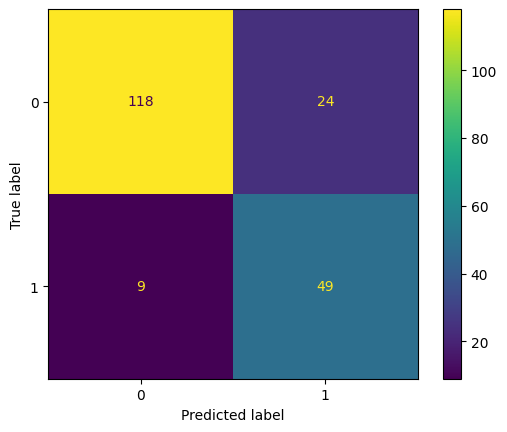

In [348]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(test_data["target"], best_model.predict(test_data[features]))
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

In [326]:
import joblib

joblib.dump(best_model, 'best_model_ep500.joblib')

['best_model_ep500.joblib']

In [377]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, precision_recall_curve

# ====================================
# 1. CARGA Y SPLIT
# ====================================
# Suponiendo que ya tienes train_data y features definidos
X_train, X_test, y_train, y_test = train_test_split(
    data_train[features],
    data_train["target"],
    test_size=0.2,
    stratify=data_train["target"],
    random_state=42
)

# ====================================
# 2. MODELO BASE
# ====================================
model = CatBoostClassifier(
    class_weights=[1., 2.5],      # más peso a la clase minoritaria
    verbose=0,
    eval_metric='Recall',         # prioriza recall en validación
    random_seed=42
)

# ====================================
# 3. ESPACIO DE BÚSQUEDA
# ====================================
param_dist = {
    'learning_rate': [0.01, 0.02, 0.03],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [500, 800, 1200]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# ====================================
# 4. RANDOM SEARCH PRIORIZANDO F1 MACRO
# ====================================
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=15,
    scoring='f1_macro',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Mejores parámetros:", random_search.best_params_)
print("Mejor score CV:", random_search.best_score_)

# ====================================
# 5. ENTRENAMIENTO FINAL SIN STOP PREMATURO
# ====================================
best_model = CatBoostClassifier(
    **random_search.best_params_,
    class_weights=[1., 2.5],
    eval_metric='Recall',
    early_stopping_rounds=None,  # sin corte prematuro
    verbose=100,
    random_seed=42
)

best_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# ====================================
# 6. AJUSTE DE THRESHOLD
# ====================================
y_proba = best_model.predict_proba(X_test)[:, 1]

# Buscamos threshold óptimo (maximiza F1 o balancea recall y precision)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"\nMejor threshold: {best_threshold:.3f}")
print(f"Precisión: {precisions[best_idx]:.4f}, Recall: {recalls[best_idx]:.4f}, F1: {f1_scores[best_idx]:.4f}")

# Predicciones con threshold ajustado
y_pred_adj = (y_proba >= best_threshold).astype(int)

# ====================================
# 7. REPORTE FINAL
# ====================================
print("\nReporte en Test con threshold ajustado:")
print(classification_report(y_test, y_pred_adj, digits=4))


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Mejores parámetros: {'learning_rate': 0.01, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 6}
Mejor score CV: 0.779784523507194
0:	learn: 0.8217391	test: 0.8448276	best: 0.8448276 (0)	total: 3.68ms	remaining: 1.83s
100:	learn: 0.8608696	test: 0.7758621	best: 0.8448276 (0)	total: 255ms	remaining: 1.01s
200:	learn: 0.9000000	test: 0.7931034	best: 0.8448276 (0)	total: 507ms	remaining: 754ms
300:	learn: 0.9391304	test: 0.7931034	best: 0.8448276 (0)	total: 770ms	remaining: 509ms
400:	learn: 0.9608696	test: 0.7931034	best: 0.8448276 (0)	total: 1.02s	remaining: 252ms
499:	learn: 0.9695652	test: 0.7758621	best: 0.8448276 (0)	total: 1.27s	remaining: 0us

bestTest = 0.8448275862
bestIteration = 0

Shrink model to first 1 iterations.

Mejor threshold: 0.500
Precisión: 0.4700, Recall: 0.8103, F1: 0.5949

Reporte en Test con threshold ajustado:
              precision    recall  f1-score   support

           0     0.8900    0.6268    0.73

In [379]:
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, precision_recall_curve


X_train, X_test, y_train, y_test = train_test_split(
    data_train[features],
    data_train["target"],
    test_size=0.05,
    stratify=data_train["target"],
    random_state=42
)


model = CatBoostClassifier(
    class_weights=[1., 2.5],
    verbose=0,
    eval_metric='Recall',
    random_seed=42
)


param_dist = {
    'learning_rate': [0.01, 0.02, 0.03],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [500, 800, 1200]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=15,
    scoring='f1_macro',
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Mejores parámetros:", random_search.best_params_)
print("Mejor score CV:", random_search.best_score_)


best_model = CatBoostClassifier(
    **random_search.best_params_,
    class_weights=[1., 2.5],
    eval_metric='Recall',
    verbose=100,
    random_seed=42
)


best_model.fit(X_train, y_train)

y_proba = best_model.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-9)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"\nBest  threshold: {best_threshold:.3f}")
print(f"Precision: {precisions[best_idx]:.4f}, Recall: {recalls[best_idx]:.4f}, F1: {f1_scores[best_idx]:.4f}")

y_pred_adj = (y_proba >= best_threshold).astype(int)


print("\nBest Model's Test Report:")
print(classification_report(y_test, y_pred_adj, digits=4))


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Mejores parámetros: {'learning_rate': 0.01, 'l2_leaf_reg': 3, 'iterations': 500, 'depth': 6}
Mejor score CV: 0.7775026513864435
0:	learn: 0.7992701	total: 3.42ms	remaining: 1.7s
100:	learn: 0.8394161	total: 245ms	remaining: 970ms
200:	learn: 0.8795620	total: 498ms	remaining: 741ms
300:	learn: 0.9051095	total: 793ms	remaining: 524ms
400:	learn: 0.9306569	total: 1.07s	remaining: 265ms
499:	learn: 0.9562044	total: 1.33s	remaining: 0us

Best  threshold: 0.600
Precision: 0.8571, Recall: 0.8571, F1: 0.8571

Best Model's Test Report:
              precision    recall  f1-score   support

           0     0.9444    0.9444    0.9444        36
           1     0.8571    0.8571    0.8571        14

    accuracy                         0.9200        50
   macro avg     0.9008    0.9008    0.9008        50
weighted avg     0.9200    0.9200    0.9200        50



In [380]:
confusion_matrix(y_test, best_model.predict(X_test))

array([[31,  5],
       [ 2, 12]])

In [373]:
import joblib

joblib.dump(best_model, 'best_model_ep500_random.joblib')

['best_model_ep500_random.joblib']